In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding,Bidirectional,LSTM,Dense,Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Twitter_Data.csv')
df.head(5)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
dist=list(df.category)
pp=[0,0,0]
for i in dist:
    if i==-1:
        pp[0]+=1
    elif i==0:
        pp[1]+=1
    else:
        pp[2]+=1
print(pp)

[35510, 55213, 72257]


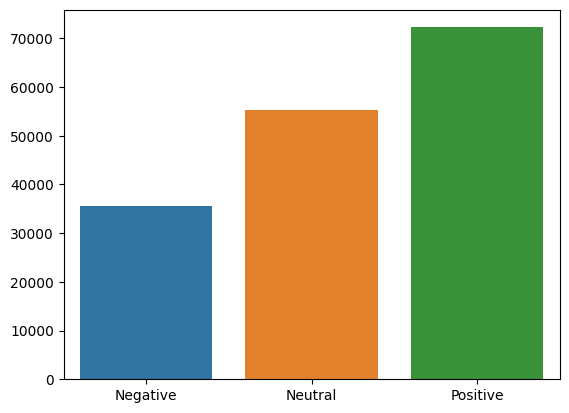

In [ ]:
labels=['Negative','Neutral','Positive']
sns.barplot(x=labels,y=pp)
plt.show()

In [ ]:
comment=list(df.clean_text.astype(str))
sentiment=list(df.category)
reddit_dict=dict(zip(comment,sentiment))

In [ ]:
print(list(reddit_dict.items())[:5])

[('when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples', -1.0), ('talk all the nonsense and continue all the drama will vote for modi ', 0.0), ('what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax', 1.0), ('asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars', 1.0), ('answer who among these the most powerful world leader today trump putin modi may ', 1.0)]


In [ ]:
Neg_list=[]
Pos_list=[]
Neutral_list=[]
for i,j in reddit_dict.items():
    if j==-1:
        Neg_list.append(i)
    elif j==0:
        Neutral_list.append(i)
    else:
        Pos_list.append(i)

In [ ]:
print(Neg_list[:2],'\n',Neutral_list[:2],'\n',Pos_list[:2])

['when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples', 'vote such party and leadershipwho can take fast and firm action none other than narendra damodardas modi and bjp party '] 
 ['talk all the nonsense and continue all the drama will vote for modi ', 'kiya tho refresh maarkefir comment karo '] 
 ['what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax', 'asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars']


In [ ]:
pos_len=[]
for i in Pos_list:
    pos_len.append(len(i))

In [ ]:
neg_len=[]
for i in Neg_list:
    neg_len.append(len(i))

In [ ]:
Neutral_len=[]
for i in Neutral_list:
    Neutral_len.append(len(i))

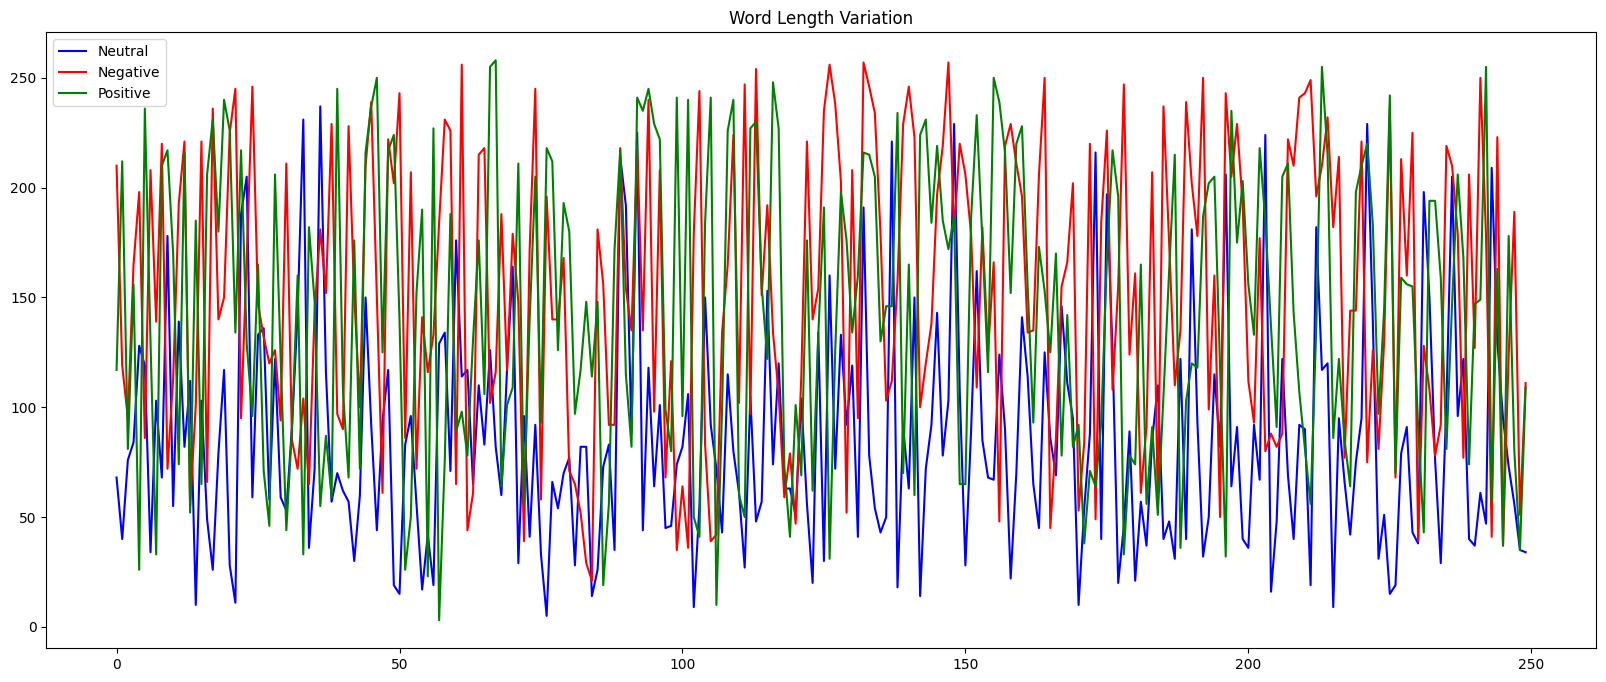

In [ ]:
plt.subplots(figsize=(20,8))
plt.title("Word Length Variation")
plt.plot(Neutral_len[:250],c='b',label='Neutral')
plt.plot(neg_len[:250],c='r',label='Negative')
plt.plot(pos_len[:250],c='g',label='Positive')
plt.legend(loc='upper left')
plt.show()

In [ ]:
pos_mean=sum(pos_len)//len(pos_len)
neg_mean=sum(neg_len)//len(neg_len)
neutral_mean=sum(Neutral_len)//len(Neutral_len)
combined_mean=(sum(pos_len)+sum(neg_len)+sum(Neutral_len))//(len(pos_len)+len(neg_len)+len(Neutral_len))

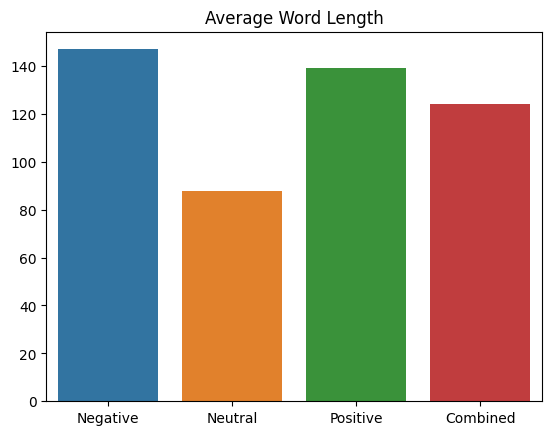

In [ ]:
plt.title("Average Word Length")
sns.barplot(x=['Negative','Neutral','Positive','Combined'],y=[neg_mean,neutral_mean,pos_mean,combined_mean])
plt.show()

In [ ]:
from functools import reduce

# Assuming df is a DataFrame with a 'clean_comment' column
X = df['clean_text'].astype('str')

# Concatenate all cleaned comments into a single string using map() and reduce()
lp = reduce(lambda x, y: x + " " + y, map(str, X))

print(lp[:100])  # Displaying the first 100 characters of the concatenated string

# Split the concatenated string into individual words using split()
st = lp.split(' ')

# Calculate the number of unique words (dictionary length)
dict_len = len(set(st))


when modi promised “minimum government maximum governance” expected him begin the difficult job refo


In [ ]:
tokenizer=Tokenizer(num_words=dict_len,lower=True,oov_token="OOV")
tokenizer.fit_on_texts(X)

In [ ]:
len(tokenizer.word_index)

113680

In [ ]:
X_train=tokenizer.texts_to_sequences(X)
X_train_padded=pad_sequences(X_train,maxlen=175,padding='post',truncating='post')

In [ ]:

X_train[:2]

[[43,
  2,
  308,
  42494,
  67,
  1727,
  42495,
  1120,
  41,
  2379,
  3,
  1212,
  206,
  17323,
  3,
  216,
  33,
  156,
  101,
  50,
  70,
  1069,
  216,
  51,
  4,
  7,
  547,
  4,
  51,
  4180,
  5583,
  4,
  2807],
 [287, 17, 3, 1105, 4, 719, 17, 3, 810, 8, 39, 5, 2]]

In [ ]:
df['category']=df['category'].replace({-1:2})

In [ ]:
mp={0:"Neutral",1:"Positve",2:"Negative"}

In [ ]:
Y=df['category'].values.astype('int')

In [ ]:
if np.any(Y < 0):
  Y = np.where(Y < 0, 0, Y)
Y_hot = to_categorical(Y, num_classes=3)

In [ ]:
print(Y_hot[:3])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [ ]:
model=Sequential()
model.add(Embedding(dict_len,64,input_length=175))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(175,return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(350,return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(700)))
model.add(Dense(3,activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 175, 64)           8446592   
                                                                 
 dropout (Dropout)           (None, 175, 64)           0         
                                                                 
 bidirectional (Bidirection  (None, 175, 350)          336000    
 al)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 175, 350)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 175, 700)          1962800   
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 175, 700)          0

In [ ]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')


In [ ]:
hist=model.fit(X_train_padded, Y_hot, epochs=3, validation_split=0.2, batch_size=87)

Epoch 1/3
1499/1499 [==============================] - 771s 506ms/step - loss: 0.3118 - accuracy: 0.8838 - val_loss: 0.1296 - val_accuracy: 0.9598
Epoch 2/3
1499/1499 [==============================] - 726s 485ms/step - loss: 0.0973 - accuracy: 0.9687 - val_loss: 0.1117 - val_accuracy: 0.9659
Epoch 3/3
1499/1499 [==============================] - 725s 484ms/step - loss: 0.0676 - accuracy: 0.9780 - val_loss: 0.1191 - val_accuracy: 0.9652


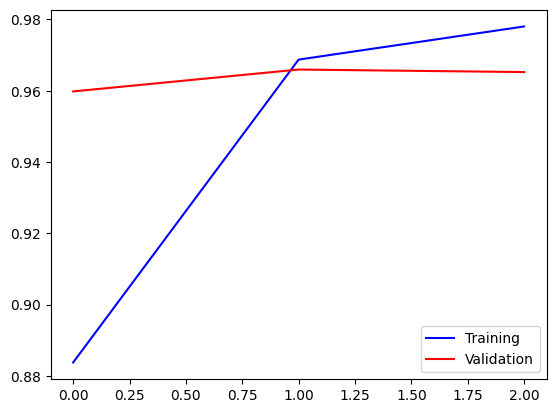

In [ ]:
plt.plot(hist.history['accuracy'],c='b',label='Training')
plt.plot(hist.history['val_accuracy'],c='r',label='Validation')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print(hist.history)


{'loss': [0.31177428364753723, 0.09730299562215805, 0.06762063503265381], 'accuracy': [0.8837817311286926, 0.9687308073043823, 0.9780264496803284], 'val_loss': [0.1296166032552719, 0.11171077191829681, 0.11906679719686508], 'val_accuracy': [0.9598110318183899, 0.9659467339515686, 0.9652411341667175]}


In [ ]:
import numpy as np

def predict(s):
    X_tes = [s]
    X_test = tokenizer.texts_to_sequences(X_tes)
    X_test_padded = pad_sequences(X_test, maxlen=175, padding='post', truncating='post')

    # Use np.argmax to get the index of the maximum value in the prediction array
    sent = int(np.argmax(model.predict(X_test_padded), axis=-1))

    print("The Predicted Sentiment is", mp[sent])

# Example usage:
text_input = "This is a positive review."
predict(text_input)


1/1 [==============================] - 2s 2s/step
The Predicted Sentiment is Positve


In [ ]:
pol="The sun is shining brightly, making this a wonderful day for a picnic in the park"
predict(pol)

1/1 [==============================] - 0s 30ms/step
The Predicted Sentiment is Positve


In [ ]:
lop="The heavy rain and thunderstorms ruined our outdoor plans for the weekend getaway"

predict(lop)

1/1 [==============================] - 0s 43ms/step
The Predicted Sentiment is Negative


In [ ]:
com="The conference will commence at 9 AM tomorrow in the main hall"
predict(com)

1/1 [==============================] - 0s 30ms/step
The Predicted Sentiment is Positve


In [ ]:
ppp="Lets Find out what this is going to be classified as"
predict(ppp)

1/1 [==============================] - 0s 41ms/step
The Predicted Sentiment is Neutral
